#### Import Statements:

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import tensorflow
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
# from constants import *
import lxml
import html.parser

In [3]:
CONTRACTION_MAPPING = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [4]:
import warnings

In [5]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

#### Read Dataset

In [6]:
data = pd.read_csv(r"U:\nlp_project\text_summarization\artifacts\data\archive\Reviews.csv")

In [7]:
data.shape

(568454, 10)

In [8]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [9]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


#### preprocessing:

In [11]:
stop_words = set(stopwords.words('english'))

- bellow i have cleaned copied the data and removed duplicate and removed `na` values.

In [12]:
data_copy = pd.DataFrame(data[["Text","Summary"]], columns=["Text","Summary"])

In [13]:
data_copy.shape

(568454, 2)

In [14]:
print(data_copy['Text'].isna().sum())
print(data_copy['Text'].duplicated().sum())

0
174875


In [15]:
print(data_copy['Summary'].isna().sum())
print(data_copy['Summary'].duplicated().sum())

27
272711


In [16]:
data_copy = (
    data_copy
    .drop_duplicates(subset=['Text'])
    .dropna(axis=0)
)

In [17]:
data_copy.columns,data_copy.shape

(Index(['Text', 'Summary'], dtype='object'), (393576, 2))

In [18]:
data_copy['Text'].shape,data_copy['Summary'].shape

((393576,), (393576,))

In [19]:
print(data_copy['Text'].isna().sum())
print(data_copy['Text'].duplicated().sum())

0
0


In [20]:
print(data_copy['Summary'].isna().sum())
print(data_copy['Summary'].duplicated().sum())

0
98877


In [21]:
# data_copy = (
#     data_copy
#     .drop_duplicates(subset=['Summary'])
#     .dropna(axis=0)
# )

In [22]:
data_copy.shape

(393576, 2)

In [23]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393576 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Text     393576 non-null  object
 1   Summary  393576 non-null  object
dtypes: object(2)
memory usage: 9.0+ MB


### Text Cleaning:

In [26]:
pd.DataFrame(data_copy['Text'])[:10] # look at first 10 datapoints.

,Text
0,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
5,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there wa..."
6,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, ..."
7,This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!
8,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too
9,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.


In [27]:
# !pip show lxml

In [28]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([CONTRACTION_MAPPING[t] if t in CONTRACTION_MAPPING else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [29]:
cleaned_text = []
for text in data_copy['Text']:
    cleaned_text.append(text_cleaner(text))

In [30]:
len(cleaned_text)

393576

### Summary Cleaning

In [31]:
pd.DataFrame(data_copy['Summary'][:10])

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy
5,Nice Taffy
6,Great! Just as good as the expensive brands!
7,"Wonderful, tasty taffy"
8,Yay Barley
9,Healthy Dog Food


In [32]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([CONTRACTION_MAPPING[t] if t in CONTRACTION_MAPPING else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

In [35]:
pd.DataFrame(data_copy["Summary"])[:10]

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy
5,Nice Taffy
6,Great! Just as good as the expensive brands!
7,"Wonderful, tasty taffy"
8,Yay Barley
9,Healthy Dog Food


In [39]:
#Call the above function
cleaned_summary = []

for summary in data_copy['Summary']:
    cleaned_summary.append(summary_cleaner(summary))

In [40]:
print(len(cleaned_summary))
print(len(cleaned_text))

393576
393576


In [41]:
data_copy['cleaned_text']=cleaned_text
data_copy['cleaned_summary']=cleaned_summary

In [50]:
# empty_string_count = (data_copy['cleaned_summary']=='').sum()
# print(empty_string_count)
# empty_string_count = (data_copy['cleaned_text']=='').sum()
# print(empty_string_count)

In [51]:
data_copy = data_copy[(data_copy["cleaned_summary"] != '') & (data_copy["cleaned_text"] != '')]

In [52]:
empty_string_count = (data_copy['cleaned_summary']=='').sum()
print(empty_string_count)
empty_string_count = (data_copy['cleaned_text']=='').sum()
print(empty_string_count)

0
0


In [53]:
data_copy.head()

,Text,Summary,cleaned_text,cleaned_summary
0,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...,Good Quality Dog Food,bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better,good quality dog food
1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",Not as Advertised,product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo,not as advertised
2,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ...","""Delight"" says it all",confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat famil...,delight says it all
3,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...,Cough Medicine,looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal,cough medicine
4,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",Great taffy,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,great taffy


In [57]:
data_copy.shape

(393231, 4)

In [58]:
data_copy.columns

Index(['Text', 'Summary', 'cleaned_text', 'cleaned_summary'], dtype='object')

#### add the <START> and <END> special tokens at the beginning and end of the summary

In [59]:
data_copy['cleaned_summary'] = data_copy['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [60]:
pd.DataFrame(data_copy['cleaned_summary'])

,cleaned_summary
0,_START_ good quality dog food _END_
1,_START_ not as advertised _END_
2,_START_ delight says it all _END_
3,_START_ cough medicine _END_
4,_START_ great taffy _END_
...,...
568449,_START_ will not do without _END_
568450,_START_ disappointed _END_
568451,_START_ perfect for our maltipoo _END_
568452,_START_ favorite training and reward treat _END_


##### look cleaned data and there summary:

In [61]:
data_copy[["cleaned_text", "cleaned_summary"]].head()

,cleaned_text,cleaned_summary
0,bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better,_START_ good quality dog food _END_
1,product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo,_START_ not as advertised _END_
2,confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat famil...,_START_ delight says it all _END_
3,looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal,_START_ cough medicine _END_
4,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,_START_ great taffy _END_


In [62]:
for i in range(5):
    print("Review:",data_copy['cleaned_text'][i])
    print("Summary:",data_copy['cleaned_summary'][i])
    print("\n")

Review: bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
Summary: _START_ good quality dog food  _END_


Review: product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
Summary: _START_ not as advertised  _END_


Review: confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch
Summary: _START_ delight says it all  _END_


Review: looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal
Summary: _START_ cough medicine  _END_


Review: great taffy great price wide assortment yummy taffy delivery quick taffy lo

#### Understanding the distribution of the sequences

In [63]:
# plt.hist(data_copy)

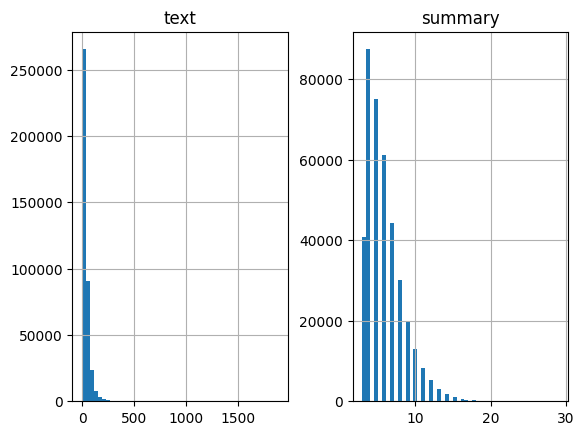

In [67]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for txt in data_copy['cleaned_text']:
      text_word_count.append(len(txt.split()))

for summary in data_copy['cleaned_summary']:
      summary_word_count.append(len(summary.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 50)
plt.show()

In [71]:
print(max(text_word_count))
print(max(summary_word_count))

1892
29


#### train-text-split

In [73]:
data_copy.shape

(393231, 4)

In [74]:
data_copy.columns

Index(['Text', 'Summary', 'cleaned_text', 'cleaned_summary'], dtype='object')

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_copy['cleaned_text'],data_copy['cleaned_summary'],test_size=0.20,random_state=42,shuffle=True)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.20,random_state=42,shuffle=True)

In [76]:
x_train.shape,y_train.shape

((251667,), (251667,))

In [77]:
x_test.shape,y_test.shape

((78647,), (78647,))

In [78]:
x_val.shape,y_val.shape

((62917,), (62917,))

In [79]:
x_train.to_csv('U:\\nlp_project\\text_summarization\\artifacts\\data\\preprocessed_data\\x_train.csv', index=False)
y_train.to_csv('U:\\nlp_project\\text_summarization\\artifacts\\data\\preprocessed_data\\y_train.csv', index=False)

x_test.to_csv('U:\\nlp_project\\text_summarization\\artifacts\\data\\preprocessed_data\\x_test.csv', index=False)
y_test.to_csv('U:\\nlp_project\\text_summarization\\artifacts\\data\\preprocessed_data\\y_test.csv', index=False)

x_val.to_csv('U:\\nlp_project\\text_summarization\\artifacts\\data\\preprocessed_data\\x_val.csv', index=False)
y_val.to_csv('U:\\nlp_project\\text_summarization\\artifacts\\data\\preprocessed_data\\y_val.csv', index=False)

In [83]:
pd.read_csv(r"U:\nlp_project\text_summarization\artifacts\data\preprocessed_data\x_train.csv").shape

(251667, 1)

In [89]:
pd.read_csv(r"U:\nlp_project\text_summarization\artifacts\data\preprocessed_data\x_test.csv").shape

(78647, 1)

In [90]:
pd.read_csv(r"U:\nlp_project\text_summarization\artifacts\data\preprocessed_data\x_val.csv").shape

(62917, 1)